This is a Digital Number Recognition Dataset

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os
import random 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.python import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.callbacks import EarlyStopping



from sklearn.metrics import classification_report
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
is_local = True

if (is_local):
    path = '/Users/rahulkotecha/Desktop/untitled folder/digit-recognizer/'
else:
    path = '../input/'

print(os.listdir(path))

['test.csv', 'train.csv', 'sample_submission.csv']


In [3]:
train_file = path+'train.csv'
test_file = path+'test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [4]:
print(f'Train data has: rows - {train_data.shape[0]} and columns- {train_data.shape[1]}')
print(f'Test data has: rows - {test_data.shape[0]} and columns- {test_data.shape[1]}')

Train data has: rows - 42000 and columns- 785
Test data has: rows - 28000 and columns- 784


In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [8]:
train_data['label'].nunique()

10

In [9]:
#Parameters

img_rows = 28
img_cols = 28
n_classes = 10
val_size = 0.2
randomstate = 2024

no_epochs= 50
batchsize = 32

In [10]:
labels = {
    0:'0',
    1:'1',
    2:'2',
    3:'3',
    4:'4',
    5:'5',
    6:'6',
    7:'7',
    8:'8',
    9:'9'
}

def class_distribution(data):
    label_counts = data['label'].value_counts()
    total_samples = len(data)
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count/total_samples)*100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [11]:
class_distribution(train_data)

1                   :   4684 or 11.152380952380952%
7                   :   4401 or 10.47857142857143%
3                   :   4351 or 10.359523809523811%
9                   :   4188 or 9.971428571428572%
2                   :   4177 or 9.945238095238096%
6                   :   4137 or 9.85%
0                   :   4132 or 9.838095238095237%
4                   :   4072 or 9.695238095238096%
8                   :   4063 or 9.673809523809524%
5                   :   3795 or 9.035714285714286%


In [12]:
def sample_images_data(data, hasLabel=True):
    sample_images = []
    sample_labels = []

    for i in labels.keys():
        samples = data[data['label']==i].head(5)

        for j,k in enumerate(samples.values):
            img = np.array(samples.iloc[j, 1: ]).reshape(img_rows, img_cols)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j,0])

    print(f'Total number of samples to plot = {len(sample_images)}')
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of samples to plot = 50


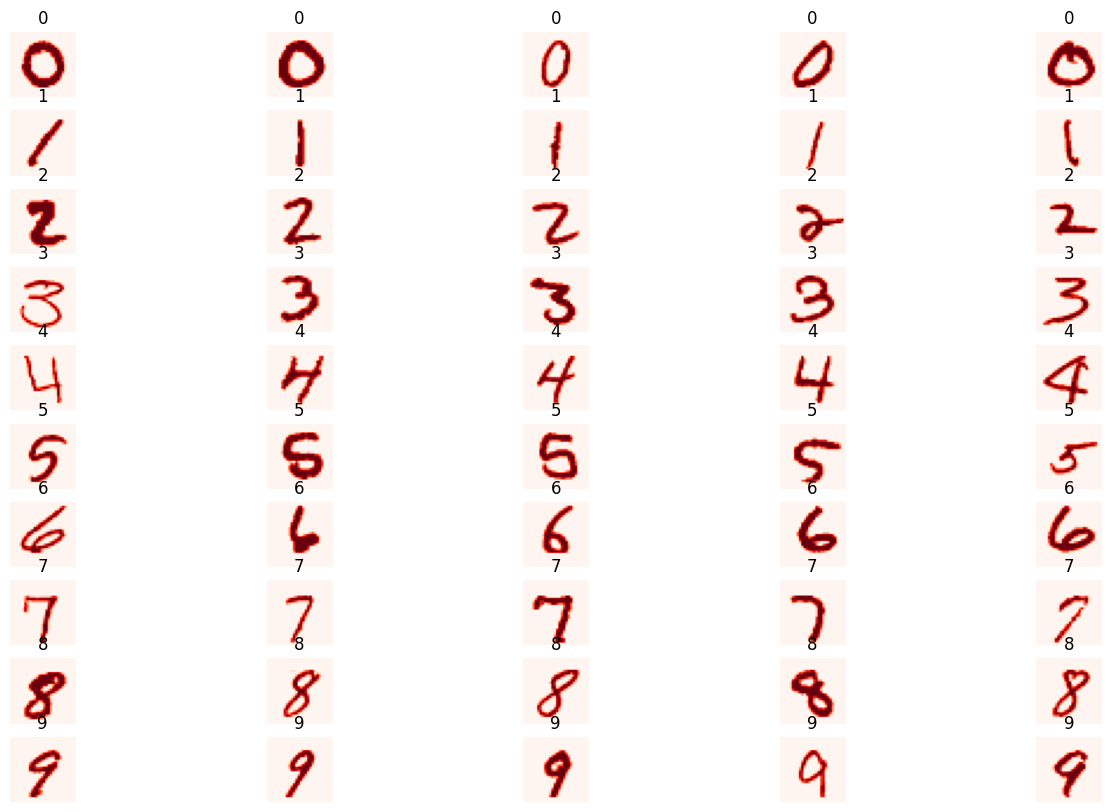

In [13]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    f, ax = plt.subplots(10,5, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//5, i%5].imshow(img, cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Reds")

In [14]:
def preprocess(data):
    out_y = to_categorical(data.label, n_classes)
    num_images = data.shape[0]
    x_as_array = data.values[ : , 1: ]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array/255
    return out_x, out_y

In [15]:
x,y=preprocess(train_data)

In [16]:
xtrain, xval, ytrain, yval = train_test_split(x,y,test_size=val_size, random_state=randomstate)

In [17]:
print("Fashion MNIST train -  rows:",xtrain.shape[0]," columns:", xtrain.shape[1:4])
print("Fashion MNIST valid -  rows:",xval.shape[0]," columns:", xval.shape[1:4])

Fashion MNIST train -  rows: 33600  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 8400  columns: (28, 28, 1)


In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [41]:
train_model = model.fit(xtrain, ytrain,
                  batch_size=batchsize,
                  epochs=no_epochs,
                  verbose=3,
                  validation_data=(xval, yval))

Epoch 1/50


2024-02-18 13:48:20.852052: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [50]:
score = model.evaluate(xval, yval, verbose=3)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.14359863102436066
Validation accuracy: 0.9882143139839172


In [18]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model1.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(n_classes, activation='softmax'))


model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
train_model1 = model1.fit(xtrain, ytrain,
                  batch_size=batchsize,
                  epochs=no_epochs,
                  verbose=3,
                  validation_data=(xval, yval),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50


2024-02-18 14:16:23.144310: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50


In [22]:
score = model1.evaluate(xval, yval, verbose=3)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.04951337352395058
Validation accuracy: 0.9859523773193359


In [23]:
def preprocess_test(data):
    num_images = data.shape[0]
    x_as_array = data.values[ : , : ]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array/255
    return out_x

In [25]:
xtest = preprocess_test(test_data)

In [26]:
xtest.shape

(28000, 28, 28, 1)

In [28]:
predicted_probabilities = model1.predict(xtest)
predicted_class = predicted_probabilities.argmax(axis=-1)

875/875 [==============================] - 3s 3ms/step


2


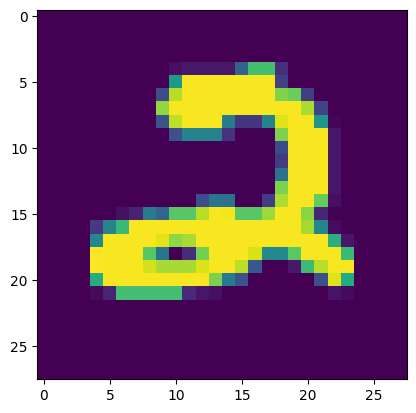

In [32]:
plt.imshow(xtest[0])
print(predicted_class[0])
plt.show()

5


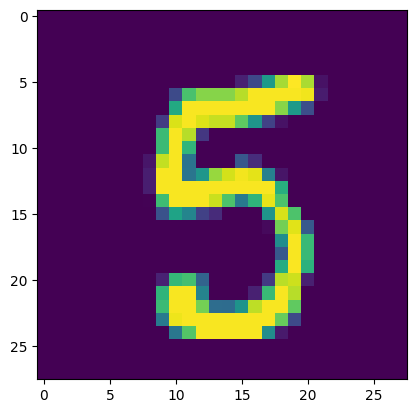

In [33]:
plt.imshow(xtest[10])
print(predicted_class[10])
plt.show()

1


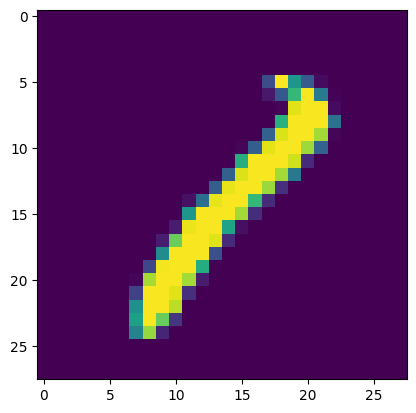

In [34]:
plt.imshow(xtest[22])
print(predicted_class[22])
plt.show()

4


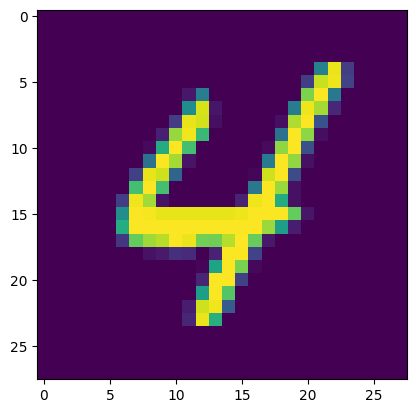

In [35]:
plt.imshow(xtest[42])
print(predicted_class[42])
plt.show()